In [17]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split


In [18]:
# Load the Boston House price prediction dataset
df = pd.read_csv('/Boston.csv')

df.head()



,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [19]:
#Preprocess the dataset

from sklearn.preprocessing import StandardScaler

X= df.drop('medv',axis = 1)
y = df['medv']

print(X[:5])

   Unnamed: 0     crim    zn  indus  chas    nox     rm   age     dis  rad  \
0           1  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1   
1           2  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2   
2           3  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2   
3           4  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3   
4           5  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3   

   tax  ptratio   black  lstat  
0  296     15.3  396.90   4.98  
1  242     17.8  396.90   9.14  
2  242     17.8  392.83   4.03  
3  222     18.7  394.63   2.94  
4  222     18.7  396.90   5.33  


In [20]:
#Split the dataset
 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3, random_state = 42)
print('training set shape:',X_train.shape,y_train.shape)
print('testing set shape:',X_test.shape,y_test.shape)

training set shape: (354, 14) (354,)
testing set shape: (152, 14) (152,)


In [21]:
from keras.models import Sequential
from keras.layers import Dense, Dropout


In [22]:
model = Sequential()
model.add(Dense(64, input_dim=14, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                960       
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3,073
Trainable params: 3,073
Non-trainable params: 0
_________________________________________________________________
None


In [23]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

In [24]:
from keras.callbacks import EarlyStopping


In [25]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

In [26]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32,callbacks=[early_stopping])


Epoch 1/100
9/9 [==============================] - 2s 35ms/step - loss: 2765.2532 - mean_absolute_error: 42.1863 - val_loss: 666.1375 - val_mean_absolute_error: 22.8364
Epoch 2/100
9/9 [==============================] - 0s 11ms/step - loss: 1447.0673 - mean_absolute_error: 29.3742 - val_loss: 243.7011 - val_mean_absolute_error: 12.5150
Epoch 3/100
9/9 [==============================] - 0s 11ms/step - loss: 653.2294 - mean_absolute_error: 20.4790 - val_loss: 268.6371 - val_mean_absolute_error: 13.6604
Epoch 4/100
9/9 [==============================] - 0s 9ms/step - loss: 711.0845 - mean_absolute_error: 21.2720 - val_loss: 112.9300 - val_mean_absolute_error: 7.5110
Epoch 5/100
9/9 [==============================] - 0s 9ms/step - loss: 576.5187 - mean_absolute_error: 18.8834 - val_loss: 117.6012 - val_mean_absolute_error: 8.1220
Epoch 6/100
9/9 [==============================] - 0s 11ms/step - loss: 465.8225 - mean_absolute_error: 16.9038 - val_loss: 116.7615 - val_mean_absolute_error: 7.

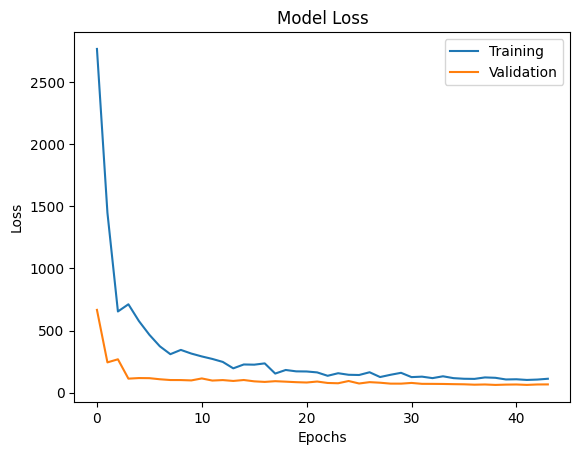

In [27]:
import matplotlib.pyplot as plt 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss']) 
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss') 
plt.legend(['Training','Validation']) 
plt.show()

In [28]:
loss, mae = model.evaluate(X_test, y_test)
print('Mean Absolute Error:', mae)


5/5 [==============================] - 0s 3ms/step - loss: 53.6043 - mean_absolute_error: 4.6697
Mean Absolute Error: 4.669704437255859
